Joseph Lannan and Jordan Jamar

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16,'font.family': 'sans-serif'})

N = 100 # this modest amount of discretization points will allow us to extract eigenvalues with a very good precision  
N2 = N**2 
invN = 1/N 
invN2 = 1/N2

def s(i):
  """ returns the position s for given index i """
  return i*invN 

def v(x):
  """ the potential at the bottom of the potential well """
  return 0

def iterator(phi, epsilon):
  """ performs Numerov algorithm; original vecrtor phi has to include the initial values at phi[0] and phi[1] """
  """ the phi will be modified and contain the iterated quantities """ 
  """ the function returns the value on the right boundary""" 
  for l in range(1,len(phi)-1):
    first_term = 2 * (1 - 5/6*invN2 * ( epsilon - v(s(l)) )) * phi[l]
    second_term = -(1 + invN2/6*(epsilon-v(s(l-1)))) * phi[l-1] 
    denominator =  (1 + invN2/6*(epsilon-v(s(l+1))))
    phi[l+1] = ( first_term + second_term ) / denominator 
  return phi[-1] 

def initial_conditions(phi):
  """ initializes the discretized wavefunction """
  for i in range(len(phi)):
    phi[i]=0.0
  phi[1] = 2*invN

def solver(e_a,e_b):
  """ implement the algorithm from lecture notes """ 
  """ the funtion should return False if \phi_a * \phi_b > 0 """
  """ the function should return the eigenvalue otherwise """ 
  phi = np.zeros(N+1)
  initial_conditions(phi)
  phi_a = iterator(phi, e_a)
  initial_conditions(phi)
  phi_b = iterator(phi, e_b) 

  while abs(e_a-e_b)>1e-10:
    if (phi_a*phi_b) > 0.0:
      return False
    e_c = (e_a+e_b) / 2.0
    phi_c = iterator(phi, e_c)
    if phi_a*phi_c<0:
      e_b = e_c
      phi_b=phi_c
    if phi_b*phi_c<0:
      e_a = e_c
      phi_a = phi_c
  return (e_a +e_b)/2


eigvs = []
for i in np.arange(0,130,1):
  eigv = solver(i,i+1) 
  if(eigv!=False): 
    eigvs.append(eigv)

print(eigvs)

[4.9348021805344615, 19.739207520120544, 44.41320519868168, 78.95675311880768, 123.36974175550858]


0.4999999999990321
0.5000000000000621
0.499999999999882
0.5000000000000396
0.5000000000000155


(-2.0, 5.0)

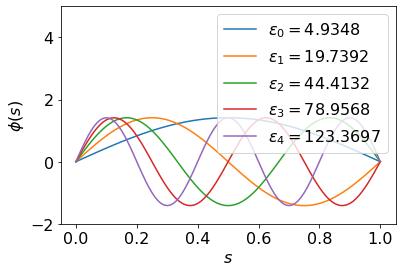

In [ ]:
i=0
for e in eigvs:
  phi = np.zeros(N+1)
  initial_conditions(phi)
  iterator(phi,e)
  norm = np.sqrt(sum(phi**2)*invN)
  plt.plot(np.arange(0,1+invN,invN),phi/norm,label=r'$\epsilon_'+str(i)+'=$'+str(round(e,4)))
  print (invN*sum (phi**2/norm**2 * np.arange(0,1+invN,invN)))
  i=i+1

plt.xlabel(r'$s$')
plt.ylabel(r'$\phi(s)$')
plt.legend(loc=1)

plt.ylim(-2,5)

[15.157039710931713, 48.56563770756475, 96.96504017859115]
0.31575106632328886
0.3573054600238556
0.3806395079891637


(-2.0, 5.0)

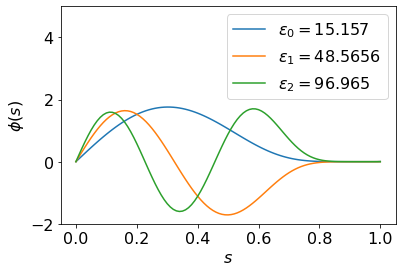

In [ ]:
# 1. Check that you reproduce: [4.9348021805344615, 19.739207520120544, 44.41320519868168, 78.95675311880768, 123.36974175550858]
# 2. Compute 5 first eigenstates for the potential: np.exp(10*x**2)
def v(x):
  """ the potential at the bottom of the potential well """
  return np.exp(10*x**2)

eigvs = []
for i in np.arange(0,130,1):
  eigv = solver(i,i+1) 
  if(eigv!=False): 
    eigvs.append(eigv)

print(eigvs)
i=0
for e in eigvs:
  phi = np.zeros(N+1)
  initial_conditions(phi)
  iterator(phi,e)
  norm = np.sqrt(sum(phi**2)*invN)
  plt.plot(np.arange(0,1+invN,invN),phi/norm,label=r'$\epsilon_'+str(i)+'=$'+str(round(e,4)))
  print (invN*sum (phi**2/norm**2 * np.arange(0,1+invN,invN)))
  i=i+1

plt.xlabel(r'$s$')
plt.ylabel(r'$\phi(s)$')
plt.legend(loc=1)

plt.ylim(-2,5)